# 7章　線形回帰

In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PDF出力用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
# 必要ライブラリimport
from sklearn.datasets import load_boston

In [4]:
# 学習用データの読み込み
# Boston Dataセットというよく使われるデータなので、関数を呼び出すと自動的にダウンロードされます

boston = load_boston()
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names

In [5]:
# 正解データ ytの表示(一部)

print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


In [6]:
# x_orgの内容を調べる

print('クラス名:', type(x_org))
print('サイズ:', x_org.shape)
print('内容表示(一部):')
print( x_org[:5,:])
print('項目名: ', feature_names)

クラス名: <class 'numpy.ndarray'>
サイズ: (506, 13)
内容表示(一部):
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# x_org は506 x 13 の行列
# この行列から'RM' の列だけを抽出する

x_data = x_org[:,feature_names == 'RM']

In [8]:
# 結果確認

print('絞り込み後のサイズ', x_data.shape)
print('絞り込み後の内容(一部)')
print( x_data[:5])

絞り込み後のサイズ (506, 1)
絞り込み後の内容(一部)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [9]:
# ダミー変数を追加

x = np.insert(x_data, 0, 1.0, axis=1)

In [10]:
# 結果確認

print('ダミー変数追加後のサイズ', x.shape)
print('ダミー変数追加後の内容(一部):')
print( x[:5,:])

ダミー変数追加後のサイズ (506, 2)
ダミー変数追加後の内容(一部):
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


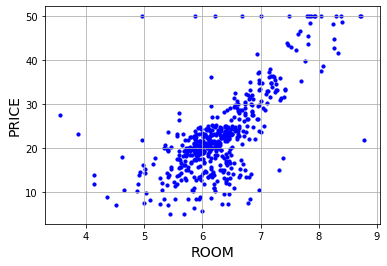

In [11]:
# 散布図の表示
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.grid()
plt.show()

In [12]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [13]:
# 初期化処理

# データ系列総数
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [14]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

iter = 29500  loss = 21.806920
iter = 29600  loss = 21.806762
iter = 29700  loss = 21.806608
iter = 29800  loss = 21.806458
iter = 29900  loss = 21.806311
iter = 30000  loss = 21.806168
iter = 30100  loss = 21.806028
iter = 30200  loss = 21.805891
iter = 30300  loss = 21.805757
iter = 30400  loss = 21.805627
iter = 30500  loss = 21.805500
iter = 30600  loss = 21.805376
iter = 30700  loss = 21.805255
iter = 30800  loss = 21.805136
iter = 30900  loss = 21.805021
iter = 31000  loss = 21.804908
iter = 31100  loss = 21.804798
iter = 31200  loss = 21.804691
iter = 31300  loss = 21.804586
iter = 31400  loss = 21.804483
iter = 31500  loss = 21.804383
iter = 31600  loss = 21.804286
iter = 31700  loss = 21.804190
iter = 31800  loss = 21.804097
iter = 31900  loss = 21.804007
iter = 32000  loss = 21.803918
iter = 32100  loss = 21.803831
iter = 32200  loss = 21.803747
iter = 32300  loss = 21.803664
iter = 32400  loss = 21.803584
iter = 32500  loss = 21.803505
iter = 32600  loss = 21.803429
iter = 3

In [15]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [16]:
# 下記直線描画用の座標値計算
xall = x[:,1]
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

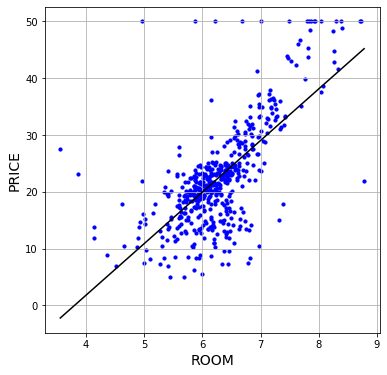

In [17]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.grid()
plt.show()

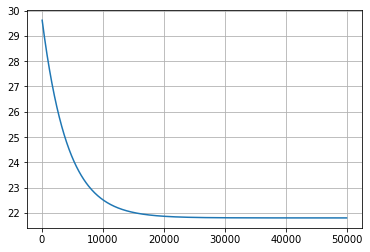

In [18]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.grid()
plt.show()

## 単回帰モデルをライブラリを使って実装する

In [19]:
# ライブラリ利用時はダミー変数が不要なので除去します
x_lib = x[:,1:2]

# 結果確認
print(x_lib[:5])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [20]:
# scikit-learn ライブラリから線形回帰モデルをロードします
from sklearn import linear_model

In [21]:
# 線形回帰モデルのインスタンスを生成します
model1 = linear_model.LinearRegression()

In [22]:
# fit関数で学習します (第一引数 入力データ、第二引数　教師データ)
model1.fit(x_lib, yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# 2つの方式の結果を比較します

# 7章の方式での切片と傾き
print("7章の方式: %6.2f %6.2f" % (w[0], w[1]))

# ライブラリ利用時の切片と傾き
# ライブラリの場合、切片はintercept_、傾きはcoef_で所得できます
print("ライブラリ: %6.2f %6.2f" % (model1.intercept_, model1.coef_))

7章の方式: -34.58   9.09
ライブラリ: -34.67   9.10


## 7.10  重回帰モデルへの拡張

In [24]:
# 列(LSTAT: 低所得者率)の取得
x_add = x_org[:,feature_names == 'LSTAT']

In [25]:
# 結果確認
print('絞り込み後のサイズ', x_add.shape)
print('絞り込み後の内容(一部)')
print( x_add[:5])

絞り込み後のサイズ (506, 1)
絞り込み後の内容(一部)
[[4.98]
 [9.14]
 [4.03]
 [2.94]
 [5.33]]


In [26]:
# xに列を追加
x2 = np.hstack((x, x_add))

In [27]:
# 結果確認
print('絞り込み後のサイズ', x2.shape)
print('絞り込み後の内容(一部)')
print( x2[:5])

絞り込み後のサイズ (506, 3)
絞り込み後の内容(一部)
[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [28]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [29]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849610628864172621824.000000
iter = 200  loss = 2655334090092026361153837184589272951329622652146491383087104.000000
iter = 300  loss = 1878297995285430553928243913715267047705770363645132117690264635882454363521086849934163968.000000
iter = 400  loss = 1328647635059358330613969788887884200681749801864725170527041101223602339574519030528101713229238117999330633839122841600.000000
iter = 500  loss = 939842635502874217447721177422780482192017393653628544426431942322285139521264510306929205153481377275006459703879895895307975579408009352139046387712.000000
iter = 600  loss = 664814474659062838166829876412465024400481392182920213194275122737070178069715197185351109716128902565652085010572959019229198835332310161243608042591804538686943536694050009645056.000000
iter = 700  loss = 4702683928354749234170587552509840192902959695143125122434426834216211579484286395118739253967111184655976062397193193150645320831510864260430077308399407119

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


iter = 5700  loss = nan
iter = 5800  loss = nan
iter = 5900  loss = nan
iter = 6000  loss = nan
iter = 6100  loss = nan
iter = 6200  loss = nan
iter = 6300  loss = nan
iter = 6400  loss = nan
iter = 6500  loss = nan
iter = 6600  loss = nan
iter = 6700  loss = nan
iter = 6800  loss = nan
iter = 6900  loss = nan
iter = 7000  loss = nan
iter = 7100  loss = nan
iter = 7200  loss = nan
iter = 7300  loss = nan
iter = 7400  loss = nan
iter = 7500  loss = nan
iter = 7600  loss = nan
iter = 7700  loss = nan
iter = 7800  loss = nan
iter = 7900  loss = nan
iter = 8000  loss = nan
iter = 8100  loss = nan
iter = 8200  loss = nan
iter = 8300  loss = nan
iter = 8400  loss = nan
iter = 8500  loss = nan
iter = 8600  loss = nan
iter = 8700  loss = nan
iter = 8800  loss = nan
iter = 8900  loss = nan
iter = 9000  loss = nan
iter = 9100  loss = nan
iter = 9200  loss = nan
iter = 9300  loss = nan
iter = 9400  loss = nan
iter = 9500  loss = nan
iter = 9600  loss = nan
iter = 9700  loss = nan
iter = 9800  los

iter = 39400  loss = nan
iter = 39500  loss = nan
iter = 39600  loss = nan
iter = 39700  loss = nan
iter = 39800  loss = nan
iter = 39900  loss = nan
iter = 40000  loss = nan
iter = 40100  loss = nan
iter = 40200  loss = nan
iter = 40300  loss = nan
iter = 40400  loss = nan
iter = 40500  loss = nan
iter = 40600  loss = nan
iter = 40700  loss = nan
iter = 40800  loss = nan
iter = 40900  loss = nan
iter = 41000  loss = nan
iter = 41100  loss = nan
iter = 41200  loss = nan
iter = 41300  loss = nan
iter = 41400  loss = nan
iter = 41500  loss = nan
iter = 41600  loss = nan
iter = 41700  loss = nan
iter = 41800  loss = nan
iter = 41900  loss = nan
iter = 42000  loss = nan
iter = 42100  loss = nan
iter = 42200  loss = nan
iter = 42300  loss = nan
iter = 42400  loss = nan
iter = 42500  loss = nan
iter = 42600  loss = nan
iter = 42700  loss = nan
iter = 42800  loss = nan
iter = 42900  loss = nan
iter = 43000  loss = nan
iter = 43100  loss = nan
iter = 43200  loss = nan
iter = 43300  loss = nan


In [30]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
#iters = 50000
iters = 2000

# 学習率
#alpha = 0.01
alpha = 0.001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [31]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))    

iter = 0  loss = 112.063982
iter = 100  loss = 25.358934
iter = 200  loss = 16.391055
iter = 300  loss = 15.403015
iter = 400  loss = 15.294135
iter = 500  loss = 15.282114
iter = 600  loss = 15.280764
iter = 700  loss = 15.280589
iter = 800  loss = 15.280544
iter = 900  loss = 15.280514
iter = 1000  loss = 15.280485
iter = 1100  loss = 15.280456
iter = 1200  loss = 15.280428
iter = 1300  loss = 15.280399
iter = 1400  loss = 15.280371
iter = 1500  loss = 15.280342
iter = 1600  loss = 15.280314
iter = 1700  loss = 15.280285
iter = 1800  loss = 15.280257
iter = 1900  loss = 15.280228


In [32]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228


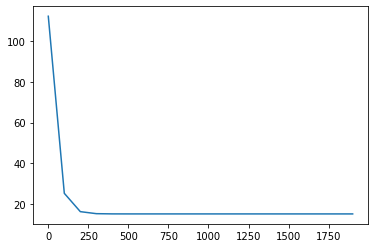

In [33]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()